# Dealing with data

One of the most important parts about deep learning is data. Data is pure raw information, human and machine representation of the observation of the world. Everything can be represented in data, including our literature, arts and science. In this lab, we are going to deal with data, apply some techniques to make our data ready to be applied in a machine learning model, and after that, separate our dataset in training, validation and test datasets and feed that data to a deep learning model. 

## Acquiring data

Before you can even prepare your dataset, you need to acquire one. Unless you already work in a place where you already have that data ready for you, you need to collect it yourself. There are a lot of places where you can acquire data, for example:

- [Datasets subreddit](https://www.reddit.com/r/datasets/), a community where you can share, request and discuss about datasets;

- [Kaggle](https://www.kaggle.com/), where you can search for a lot of different datasets, jupyter notebooks applying that data, and even engage in competitions;

- [Awesome datasets in Github](https://github.com/awesomedata/awesome-public-datasets), a curated list of datasets of a lot of different subjects, hosted in Github.

Sometimes, your data will not be easily available, and you will have to get your hands dirty to collect it. While it is beyond the scope of this lab, it is worth to mention that common data collection techniques involve the usage of sensors and [web-scraping](https://en.wikipedia.org/wiki/Web_scraping).


## Preprocessing the data

Let's say we downloaded the records of a HR department of a company specialized in engineering. This dataset in particular, is about the hires for a software engineering position.

In [1]:
# First, let's import our packages as usual.
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Then, let's load our dataset.
import os.path
path = "./Datasets/hires.csv"
if os.path.isfile(path) :
    dataset = pd.read_csv(path)
else:
    dataset = pd.read_csv("3-Feeding-your-models-with-data/" + path)

# Let's take a look at the columns we have in this dataset.
print("Dataset Columns: {}\n".format(dataset.columns.values))

Dataset Columns: ['id' 'years_of_experience' 'interview_score' 'name' 'hired']



As you can see, we have the following features:

- name: the candidate name;
- interview_score: a subjective grade that was given to the performance of the candidate in the hiring interview;
- years_of_experience: how many years this particular candidate has in the software engineering industry

And a class:

- hired: which means if the candidate ended up being hired or not;


Now, let's take a closer look at our dataset: 

In [3]:
# To see some of the data inside our dataset, simply use the dataset variable.
dataset

,id,years_of_experience,interview_score,name,hired
0,1,18,0.54,Stacia Ketchen,False
1,2,6,0.29,Maryann Rumney,False
2,3,6,NaN,Tristam Oliveti,False
3,4,2,0.51,Andrea Gianinotti,False
4,5,2,0.74,Karena Sheran,False
...,...,...,...,...,...
995,996,6,0.78,Leese Ciccoloi,False
996,997,5,0.67,Inger Ivashechkin,False
997,998,5,0.46,Jessalyn Bedingfield,False
998,999,5,0.89,Deerdre Squibe,True


There are some incomplete data inside our dataset. Incomplete data is, most of the times, bad data. So, we need to remove them.

In [4]:
import math
# Remove empty rows from dataset
for index, data in dataset.iterrows():
    if(math.isnan(data.interview_score) or math.isnan(data.years_of_experience)):
        dataset.drop(index = index, inplace = True)

# Show the updated dataset        
dataset

,id,years_of_experience,interview_score,name,hired
0,1,18,0.54,Stacia Ketchen,False
1,2,6,0.29,Maryann Rumney,False
3,4,2,0.51,Andrea Gianinotti,False
4,5,2,0.74,Karena Sheran,False
6,7,9,0.40,Rafaellle Goodbody,False
...,...,...,...,...,...
994,995,6,0.67,Alexine Bannister,False
995,996,6,0.78,Leese Ciccoloi,False
996,997,5,0.67,Inger Ivashechkin,False
997,998,5,0.46,Jessalyn Bedingfield,False


We also need to decide what features are important for the problem we are trying to solve. Deciding what features are important, is a key part of machine learning. Remember, bad data equals to bad results, and wrong features are bad data.

In this case, the interview score and the years of experience of the candidate are important features, but the name of the candidate is completely irrelevant for our model, so we can just take it out from our dataset:

In [5]:
# Delete the column name
del dataset['id']
del dataset['name']
# Show our updated dataset
dataset

,years_of_experience,interview_score,hired
0,18,0.54,False
1,6,0.29,False
3,2,0.51,False
4,2,0.74,False
6,9,0.40,False
...,...,...,...
994,6,0.67,False
995,6,0.78,False
996,5,0.67,False
997,5,0.46,False


Another thing that you should have in mind, is that "True" and "False", doesn't mean anything to a machine. We need to convert that into something that a computer will understand:

In [6]:
# Convert true to 1, and false to 0
dataset.hired = dataset.hired.astype(int)
dataset

,years_of_experience,interview_score,hired
0,18,0.54,0
1,6,0.29,0
3,2,0.51,0
4,2,0.74,0
6,9,0.40,0
...,...,...,...
994,6,0.67,0
995,6,0.78,0
996,5,0.67,0
997,5,0.46,0


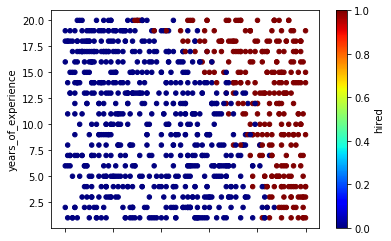

In [7]:
# Let's plot the dataset, so we can see who got hired and those who didn't.
dataset.plot(kind='scatter', x="interview_score", y="years_of_experience", c="hired", colormap='jet')

At this point, we could train our network using this dataset. But we could also improve it's representation to make it easier for the network to learn the dataset behavior. The attribute 'years_of_experience' is a value from 1 to 20 (inside our dataset). Let's normalize these values to fit between 0 and 1.

In [8]:
# Converts the dataset to numpy arrays
X = np.array(dataset[["years_of_experience","interview_score"]].astype(float))
Y = np.array(dataset[["hired"]])
Y = np.ravel(Y)

# Normalizes the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([X[:,0]]).T)
normalized = scaler.transform(np.array([X[:,0]]).T)

# Updates only the attribute "years_of_experience" with the normalized values
X[:,0] = normalized[:,0]

Now, let's separate our dataset into test and training datasets:

In [9]:
# Separate the dataset into test and training datasets
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.25,)

Now let's build a simple classification neural network and train it:

In [10]:
def build_model():
    # Input layer
    inputs = Input([2, ], name='data')
    # Hidden layers
    model = Dense(64, activation='relu')(inputs)
    model = Dense(64, activation='relu')(inputs)
    # Output layer
    outputs = Dense(1, activation='sigmoid', name='fc3')(model)

    # Define the model
    model = Model(inputs=[inputs], outputs=outputs)

    return model

net = build_model()
print(net.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                192       
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
Y_train.mean()

0.3141592920353982

In [12]:
import keras.backend as K
def loss_function(y_true, y_pred):
    r = 0.7*y_true + 0.3*(1-y_true)
    r /= 0.3
    e = K.binary_crossentropy(y_true, y_pred)*r
    return e

In [13]:
from keras import metrics
net.compile(optimizer='sgd',
              loss=loss_function,
              metrics=[metrics.Precision(),metrics.Recall()])

history = net.fit(X_train,
        Y_train,
        validation_data=(X_test, Y_test),
        epochs=1500,
        batch_size=8)

Train on 678 samples, validate on 227 samples
Epoch 1/1500
678/678 [==============================] - 0s 362us/step - loss: 0.6713 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6395 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/1500
678/678 [==============================] - 0s 135us/step - loss: 0.6415 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.6131 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/1500
678/678 [==============================] - 0s 137us/step - loss: 0.6201 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.5921 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/1500
678/678 [==============================] - 0s 141us/step - loss: 0.6020 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 0.5752 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/1500
678/678 [==============================] - 0s 156us/step - loss: 0.5854 - precision_1: 0.0000e+00 - r

678/678 [==============================] - 0s 143us/step - loss: 0.1492 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1767 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 85/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1495 - precision_1: 0.9091 - recall_1: 0.9390 - val_loss: 0.1741 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 86/1500
678/678 [==============================] - 0s 142us/step - loss: 0.1487 - precision_1: 0.9087 - recall_1: 0.9343 - val_loss: 0.1731 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 87/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1484 - precision_1: 0.9095 - recall_1: 0.9437 - val_loss: 0.1691 - val_precision_1: 0.8462 - val_recall_1: 0.9016
Epoch 88/1500
678/678 [==============================] - 0s 138us/step - loss: 0.1478 - precision_1: 0.9132 - recall_1: 0.9390 - val_loss: 0.1708 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 89/1500
678/678 [================

Epoch 167/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1302 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1510 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 168/1500
678/678 [==============================] - 0s 151us/step - loss: 0.1301 - precision_1: 0.9083 - recall_1: 0.9296 - val_loss: 0.1509 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 169/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1301 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1503 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 170/1500
678/678 [==============================] - 0s 139us/step - loss: 0.1300 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1506 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 171/1500
678/678 [==============================] - 0s 138us/step - loss: 0.1296 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1545 - val_precision_1: 0.8382 - val_recall_1: 0.9344
Epoch 172/1500
678/6

Epoch 250/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1266 - precision_1: 0.9041 - recall_1: 0.9296 - val_loss: 0.1482 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 251/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1263 - precision_1: 0.9171 - recall_1: 0.9343 - val_loss: 0.1470 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 252/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1268 - precision_1: 0.9078 - recall_1: 0.9249 - val_loss: 0.1470 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 253/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1262 - precision_1: 0.9083 - recall_1: 0.9296 - val_loss: 0.1445 - val_precision_1: 0.9048 - val_recall_1: 0.9344
Epoch 254/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1265 - precision_1: 0.9206 - recall_1: 0.9249 - val_loss: 0.1461 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 255/1500
678/6

Epoch 292/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1257 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1463 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 293/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1261 - precision_1: 0.9041 - recall_1: 0.9296 - val_loss: 0.1446 - val_precision_1: 0.8769 - val_recall_1: 0.9344
Epoch 294/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1256 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1468 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 295/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1253 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1509 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 296/1500
678/678 [==============================] - 0s 143us/step - loss: 0.1256 - precision_1: 0.9132 - recall_1: 0.9390 - val_loss: 0.1449 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 297/1500
678/6

Epoch 334/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1253 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1471 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 335/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1254 - precision_1: 0.9083 - recall_1: 0.9296 - val_loss: 0.1467 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 336/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1253 - precision_1: 0.9167 - recall_1: 0.9296 - val_loss: 0.1472 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 337/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1257 - precision_1: 0.9083 - recall_1: 0.9296 - val_loss: 0.1458 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 338/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1248 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1472 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 339/1500
678/6

Epoch 376/1500
678/678 [==============================] - 0s 139us/step - loss: 0.1246 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1460 - val_precision_1: 0.8507 - val_recall_1: 0.9344
Epoch 377/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1242 - precision_1: 0.9000 - recall_1: 0.9296 - val_loss: 0.1416 - val_precision_1: 0.9048 - val_recall_1: 0.9344
Epoch 378/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1251 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1431 - val_precision_1: 0.9048 - val_recall_1: 0.9344
Epoch 379/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1244 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1485 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 380/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1245 - precision_1: 0.9083 - recall_1: 0.9296 - val_loss: 0.1430 - val_precision_1: 0.9048 - val_recall_1: 0.9344
Epoch 381/1500
678/6

Epoch 459/1500
678/678 [==============================] - 0s 136us/step - loss: 0.1229 - precision_1: 0.9087 - recall_1: 0.9343 - val_loss: 0.1402 - val_precision_1: 0.9032 - val_recall_1: 0.9180
Epoch 460/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1235 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1415 - val_precision_1: 0.8906 - val_recall_1: 0.9344
Epoch 461/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1238 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1428 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 462/1500
678/678 [==============================] - 0s 139us/step - loss: 0.1238 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1470 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 463/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1234 - precision_1: 0.9078 - recall_1: 0.9249 - val_loss: 0.1412 - val_precision_1: 0.9048 - val_recall_1: 0.9344
Epoch 464/1500
678/6

Epoch 542/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1227 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1453 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 543/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1215 - precision_1: 0.9041 - recall_1: 0.9296 - val_loss: 0.1394 - val_precision_1: 0.9032 - val_recall_1: 0.9180
Epoch 544/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1225 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1402 - val_precision_1: 0.8906 - val_recall_1: 0.9344
Epoch 545/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1228 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1408 - val_precision_1: 0.8906 - val_recall_1: 0.9344
Epoch 546/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1225 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1416 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 547/1500
678/6

Epoch 584/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1210 - precision_1: 0.9155 - recall_1: 0.9155 - val_loss: 0.1484 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 585/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1212 - precision_1: 0.9045 - recall_1: 0.9343 - val_loss: 0.1412 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 586/1500
678/678 [==============================] - 0s 136us/step - loss: 0.1217 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1422 - val_precision_1: 0.8382 - val_recall_1: 0.9344
Epoch 587/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1217 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1405 - val_precision_1: 0.8636 - val_recall_1: 0.9344
Epoch 588/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1203 - precision_1: 0.9206 - recall_1: 0.9249 - val_loss: 0.1464 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 589/1500
678/6

Epoch 667/1500
678/678 [==============================] - 0s 139us/step - loss: 0.1195 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1389 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 668/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1200 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1392 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 669/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1195 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1389 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 670/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1199 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1412 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 671/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1191 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1380 - val_precision_1: 0.8750 - val_recall_1: 0.9180
Epoch 672/1500
678/6

Epoch 709/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1187 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1419 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 710/1500
678/678 [==============================] - 0s 152us/step - loss: 0.1183 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1390 - val_precision_1: 0.8485 - val_recall_1: 0.9180
Epoch 711/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1182 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1375 - val_precision_1: 0.8750 - val_recall_1: 0.9180
Epoch 712/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1181 - precision_1: 0.9078 - recall_1: 0.9249 - val_loss: 0.1360 - val_precision_1: 0.8889 - val_recall_1: 0.9180
Epoch 713/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1185 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1412 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 714/1500
678/6

Epoch 792/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1160 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1378 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 793/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1153 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1352 - val_precision_1: 0.8750 - val_recall_1: 0.9180
Epoch 794/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1151 - precision_1: 0.9242 - recall_1: 0.9155 - val_loss: 0.1410 - val_precision_1: 0.8235 - val_recall_1: 0.9180
Epoch 795/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1156 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1369 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 796/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1146 - precision_1: 0.9202 - recall_1: 0.9202 - val_loss: 0.1433 - val_precision_1: 0.8261 - val_recall_1: 0.9344
Epoch 797/1500
678/6

Epoch 834/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1145 - precision_1: 0.9124 - recall_1: 0.9296 - val_loss: 0.1347 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 835/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1145 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1339 - val_precision_1: 0.8750 - val_recall_1: 0.9180
Epoch 836/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1142 - precision_1: 0.9198 - recall_1: 0.9155 - val_loss: 0.1385 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 837/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1141 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1390 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 838/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1144 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1360 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 839/1500
678/6

Epoch 876/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1129 - precision_1: 0.9116 - recall_1: 0.9202 - val_loss: 0.1375 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 877/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1127 - precision_1: 0.9206 - recall_1: 0.9249 - val_loss: 0.1356 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 878/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1122 - precision_1: 0.9202 - recall_1: 0.9202 - val_loss: 0.1413 - val_precision_1: 0.8235 - val_recall_1: 0.9180
Epoch 879/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1125 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1397 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 880/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1129 - precision_1: 0.9167 - recall_1: 0.9296 - val_loss: 0.1376 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 881/1500
678/6

Epoch 918/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1112 - precision_1: 0.9245 - recall_1: 0.9202 - val_loss: 0.1379 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 919/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1112 - precision_1: 0.9091 - recall_1: 0.9390 - val_loss: 0.1334 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 920/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1110 - precision_1: 0.9171 - recall_1: 0.9343 - val_loss: 0.1312 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 921/1500
678/678 [==============================] - 0s 142us/step - loss: 0.1115 - precision_1: 0.9206 - recall_1: 0.9249 - val_loss: 0.1310 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 922/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1114 - precision_1: 0.9167 - recall_1: 0.9296 - val_loss: 0.1339 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 923/1500
678/6

Epoch 960/1500
678/678 [==============================] - 0s 129us/step - loss: 0.1104 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1336 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 961/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1098 - precision_1: 0.9120 - recall_1: 0.9249 - val_loss: 0.1319 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 962/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1102 - precision_1: 0.9159 - recall_1: 0.9202 - val_loss: 0.1326 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 963/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1100 - precision_1: 0.9163 - recall_1: 0.9249 - val_loss: 0.1329 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 964/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1102 - precision_1: 0.9209 - recall_1: 0.9296 - val_loss: 0.1344 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 965/1500
678/6

Epoch 1002/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1096 - precision_1: 0.9132 - recall_1: 0.9390 - val_loss: 0.1334 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1003/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1089 - precision_1: 0.9174 - recall_1: 0.9390 - val_loss: 0.1322 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1004/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1089 - precision_1: 0.9171 - recall_1: 0.9343 - val_loss: 0.1341 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1005/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1092 - precision_1: 0.9178 - recall_1: 0.9437 - val_loss: 0.1320 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1006/1500
678/678 [==============================] - 0s 137us/step - loss: 0.1084 - precision_1: 0.9174 - recall_1: 0.9390 - val_loss: 0.1296 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1007/1500

Epoch 1085/1500
678/678 [==============================] - 0s 137us/step - loss: 0.1071 - precision_1: 0.9209 - recall_1: 0.9296 - val_loss: 0.1322 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1086/1500
678/678 [==============================] - 0s 146us/step - loss: 0.1070 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1341 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1087/1500
678/678 [==============================] - 0s 158us/step - loss: 0.1069 - precision_1: 0.9182 - recall_1: 0.9484 - val_loss: 0.1290 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1088/1500
678/678 [==============================] - 0s 148us/step - loss: 0.1068 - precision_1: 0.9206 - recall_1: 0.9249 - val_loss: 0.1303 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1089/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1070 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1309 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1090/1500

Epoch 1168/1500
678/678 [==============================] - 0s 138us/step - loss: 0.1054 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1324 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1169/1500
678/678 [==============================] - 0s 139us/step - loss: 0.1055 - precision_1: 0.9259 - recall_1: 0.9390 - val_loss: 0.1308 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1170/1500
678/678 [==============================] - 0s 167us/step - loss: 0.1051 - precision_1: 0.9259 - recall_1: 0.9390 - val_loss: 0.1328 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1171/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1052 - precision_1: 0.9171 - recall_1: 0.9343 - val_loss: 0.1299 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1172/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1047 - precision_1: 0.9174 - recall_1: 0.9390 - val_loss: 0.1263 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1173/1500

Epoch 1251/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1035 - precision_1: 0.9249 - recall_1: 0.9249 - val_loss: 0.1365 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1252/1500
678/678 [==============================] - 0s 137us/step - loss: 0.1047 - precision_1: 0.9220 - recall_1: 0.9437 - val_loss: 0.1323 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1253/1500
678/678 [==============================] - 0s 138us/step - loss: 0.1040 - precision_1: 0.9259 - recall_1: 0.9390 - val_loss: 0.1343 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1254/1500
678/678 [==============================] - 0s 156us/step - loss: 0.1041 - precision_1: 0.9259 - recall_1: 0.9390 - val_loss: 0.1323 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1255/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1040 - precision_1: 0.9209 - recall_1: 0.9296 - val_loss: 0.1350 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1256/1500

Epoch 1334/1500
678/678 [==============================] - 0s 145us/step - loss: 0.1032 - precision_1: 0.9259 - recall_1: 0.9390 - val_loss: 0.1264 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1335/1500
678/678 [==============================] - 0s 134us/step - loss: 0.1035 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1282 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1336/1500
678/678 [==============================] - 0s 138us/step - loss: 0.1034 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1292 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1337/1500
678/678 [==============================] - 0s 151us/step - loss: 0.1035 - precision_1: 0.9252 - recall_1: 0.9296 - val_loss: 0.1327 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1338/1500
678/678 [==============================] - 0s 146us/step - loss: 0.1034 - precision_1: 0.9213 - recall_1: 0.9343 - val_loss: 0.1349 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1339/1500

Epoch 1417/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1030 - precision_1: 0.9252 - recall_1: 0.9296 - val_loss: 0.1332 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1418/1500
678/678 [==============================] - 0s 131us/step - loss: 0.1023 - precision_1: 0.9136 - recall_1: 0.9437 - val_loss: 0.1248 - val_precision_1: 0.8615 - val_recall_1: 0.9180
Epoch 1419/1500
678/678 [==============================] - 0s 130us/step - loss: 0.1028 - precision_1: 0.9292 - recall_1: 0.9249 - val_loss: 0.1335 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1420/1500
678/678 [==============================] - 0s 132us/step - loss: 0.1029 - precision_1: 0.9213 - recall_1: 0.9343 - val_loss: 0.1319 - val_precision_1: 0.8358 - val_recall_1: 0.9180
Epoch 1421/1500
678/678 [==============================] - 0s 133us/step - loss: 0.1026 - precision_1: 0.9256 - recall_1: 0.9343 - val_loss: 0.1370 - val_precision_1: 0.8235 - val_recall_1: 0.9180
Epoch 1422/1500

Epoch 1500/1500
678/678 [==============================] - 0s 135us/step - loss: 0.1026 - precision_1: 0.9217 - recall_1: 0.9390 - val_loss: 0.1298 - val_precision_1: 0.8615 - val_recall_1: 0.9180


['val_loss', 'val_precision_1', 'val_recall_1', 'loss', 'precision_1', 'recall_1']


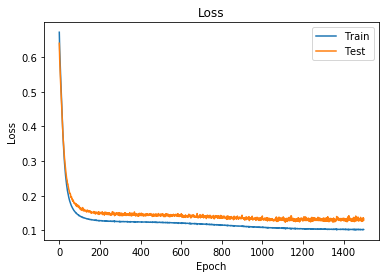

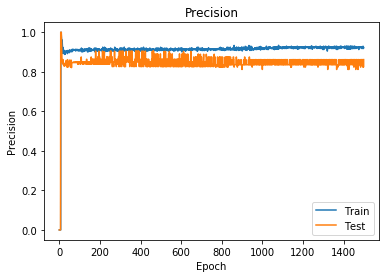

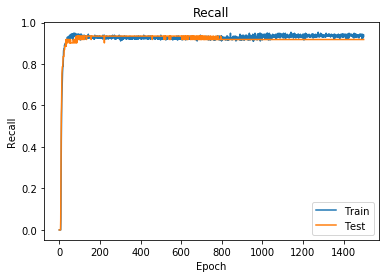

In [14]:
metric_v = list(history.history.keys())
print(metric_v)

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history[metric_v[3]])
plt.plot(history.history[metric_v[0]])
plt.legend(['Train','Test'])
plt.show()

plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.plot(history.history[metric_v[4]])
plt.plot(history.history[metric_v[1]])
plt.legend(['Train','Test'])
plt.show()

plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.plot(history.history[metric_v[5]])
plt.plot(history.history[metric_v[2]])
plt.legend(['Train','Test'])
plt.show()

In [15]:
# Print model performance
_, train_prec, train_recall = net.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain precision:', train_prec)
print('Train recall:', train_recall)

_, test_prec, test_recall = net.evaluate(X_test,  Y_test, verbose=2)
print('\nTest precision:', test_prec)
print('Test recall:', test_recall)

# Predict if a new candidate with interview score of 0.6 and 15 years of experience will be hired
input = np.array([[0.5,0.5]])
prediction = net.predict(input)
for index, predict in enumerate(prediction):
    print("Candidate has {:.2f}% chance to be hired".format(predict[0]*100))


Train precision: 0.9252336621284485
Train recall: 0.9295774698257446

Test precision: 0.8615384697914124
Test recall: 0.9180327653884888
Candidate has 0.12% chance to be hired


We can generate a map covering all the possible predictions to see how our model behaves

Remember that years_of_experience was normalized, so 0 and 1 respectively represent 1.0 and 20.0.


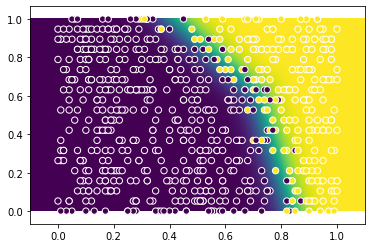

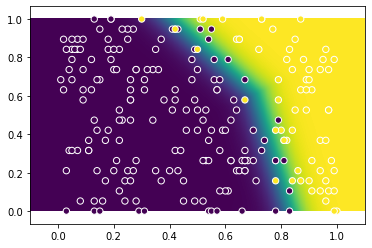

In [16]:
# Generate a classification map
N = 60

years_range = (X[:,0].min(), X[:,0].max())
scores_range = (X[:,1].min()-.1, X[:,1].max()+.1)

linear_years = np.linspace(years_range[0], years_range[1], N)
linear_scores = np.linspace(scores_range[0], scores_range[1], N)

prediction_map = np.array([net.predict(np.array([[i,j]])) for j in linear_scores for i in linear_years]).reshape(N, N).T

years_range_unscale = scaler.inverse_transform(np.array([years_range]))
print("Remember that years_of_experience was normalized, so 0 and 1 respectively represent {0} and {1}."
      .format(years_range_unscale[0,0], years_range_unscale[0,1]))

# Plots our test dataset on top of our prediction map
plt.imshow(prediction_map,
           interpolation='bilinear',
           extent=[
               scores_range[0], scores_range[1],years_range[0], years_range[1], 
           ],
           aspect='auto' , origin='lower')
plt.scatter(np.array(X_train)[:,1], np.array(X_train)[:,0], 40, Y_train, edgecolors='w')
plt.show()

# Plots our test dataset on top of our prediction map
plt.imshow(prediction_map,
           interpolation='bilinear',
           extent=[
               scores_range[0], scores_range[1],years_range[0], years_range[1], 
           ],
           aspect='auto' , origin='lower')
plt.scatter(np.array(X_test)[:,1], np.array(X_test)[:,0], 40, Y_test, edgecolors='w')
plt.show()